/**
 ******************************************************************************
 * @file           : notebook python for hypermarket database
 * @version        : Version : 1:0:0
 * @Auther         : Ahmed Nour
 * @brief          : connect to DB and read data from it
 ******************************************************************************
 */


In [12]:
from sqlalchemy import create_engine , text

# Corrected connection string with proper formatting and escaping
DATABASE = 'hypermarketDB'
SERVER = r'DESKTOP-9LR8JQK\TEW_SQLEXPRESS'  # Raw string to handle backslash
DRIVER = 'ODBC Driver 17 for SQL Server'
USERNAME = 'hyper_DB'
PASSWORD = '12345'

# Construct the connection string using 'mssql+pyodbc' and escape characters
#DATABASE_CONNECTION = f'mssql+pyodbc://{USERNAME}:{PASSWORD}@{SERVER}/{DATABASE}?driver={DRIVER}'

DATABASE_CONNECTION = f'mssql+pyodbc://{USERNAME}:{PASSWORD}@{SERVER}/{DATABASE}?driver={DRIVER.replace(" ", "+")}'


In [13]:
# Create the SQLAlchemy engine and connect
engine = create_engine(DATABASE_CONNECTION)

# Test the connection
try:
    with engine.connect() as connection:
        print("Connection successful!")
except Exception as e:
    print(f"Failed to connect: {e}")


Connection successful!


In [3]:
with engine.connect() as connection:
    result = connection.execute(text("SELECT * FROM store where city ='New York'"))
    
    # Fetch all results
    for row in result:
        print(row)

(1, 'Fashion Hub', 'New York', 'New York')
(21, 'Plumber', 'New York', 'New York')
(41, 'Plumber', 'New York', 'New York')
(61, 'Laborer', 'New York', 'New York')
(81, 'Ironworker', 'New York', 'New York')
(101, 'Millwright', 'New York', 'New York')
(121, 'Plasterers', 'New York', 'New York')
(141, 'Equipment Operator', 'New York', 'New York')
(161, 'Electrician', 'New York', 'New York')
(181, 'Millwright', 'New York', 'New York')
(201, 'Laborer', 'New York', 'New York')
(221, 'Safety Officer', 'New York', 'New York')
(241, 'Linemen', 'New York', 'New York')
(261, 'Millwright', 'New York', 'New York')
(281, 'Plumber', 'New York', 'New York')
(301, 'Waterproofer', 'New York', 'New York')
(321, 'Terrazzo', 'New York', 'New York')
(341, 'Equipment Operator', 'New York', 'New York')
(361, 'Cement Mason', 'New York', 'New York')
(381, 'Boilermaker', 'New York', 'New York')
(401, 'Welder', 'New York', 'New York')
(421, 'Equipment Operator', 'New York', 'New York')
(441, 'Linemen', 'New York'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

quries = 'select * from store'
qurey_staff = 'select * from staff'

df=pd.read_sql_query(quries,engine)
df=pd.read_sql_query(qurey_staff,engine)


print(df.tail(10))

     staff_id  f_name     l_name                            Email  manager_id
490       491   David   Williams    david.williams491@company.com       188.0
491       492     Mia     Garcia        mia.garcia492@company.com       188.0
492       493   Sarah      Smith       sarah.smith493@company.com       188.0
493       494   Grace   Martinez    grace.martinez494@company.com       188.0
494       495  Daniel    Jackson    daniel.jackson495@company.com       188.0
495       496  Olivia  Rodriguez  olivia.rodriguez496@company.com       188.0
496       497     Ava  Hernandez     ava.hernandez497@company.com       188.0
497       498     Ava      Davis         ava.davis498@company.com       188.0
498       499  Sophia      Moore      sophia.moore499@company.com       188.0
499       500  Robert     Thomas     robert.thomas500@company.com       188.0


In [5]:
print(df.isnull().values.any())

print(df.dtypes)

True
staff_id        int64
f_name         object
l_name         object
Email          object
manager_id    float64
dtype: object


A bar chart showing the number of stores in each city.
Another bar chart showing the number of staff assigned to each store.

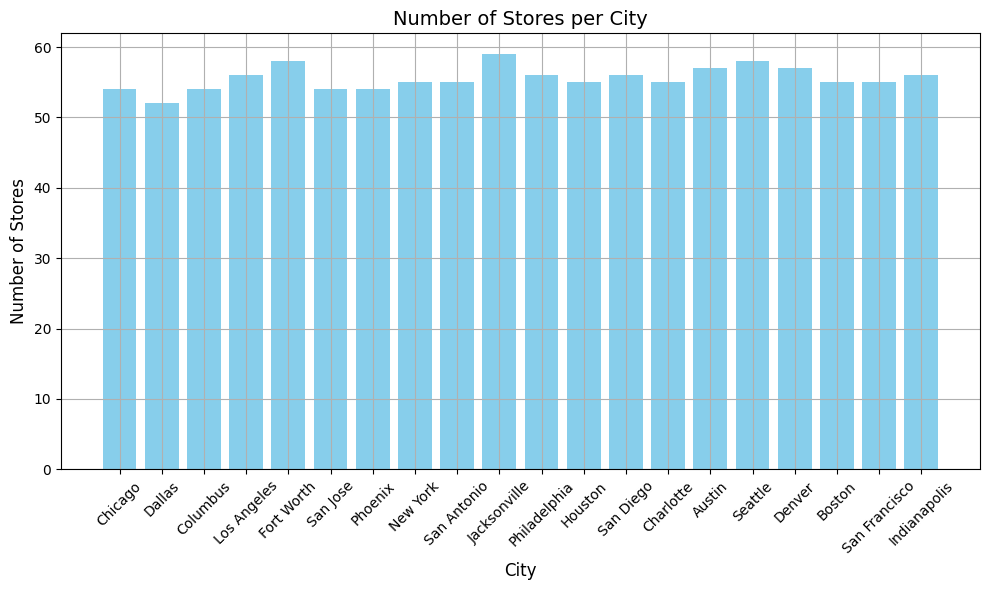

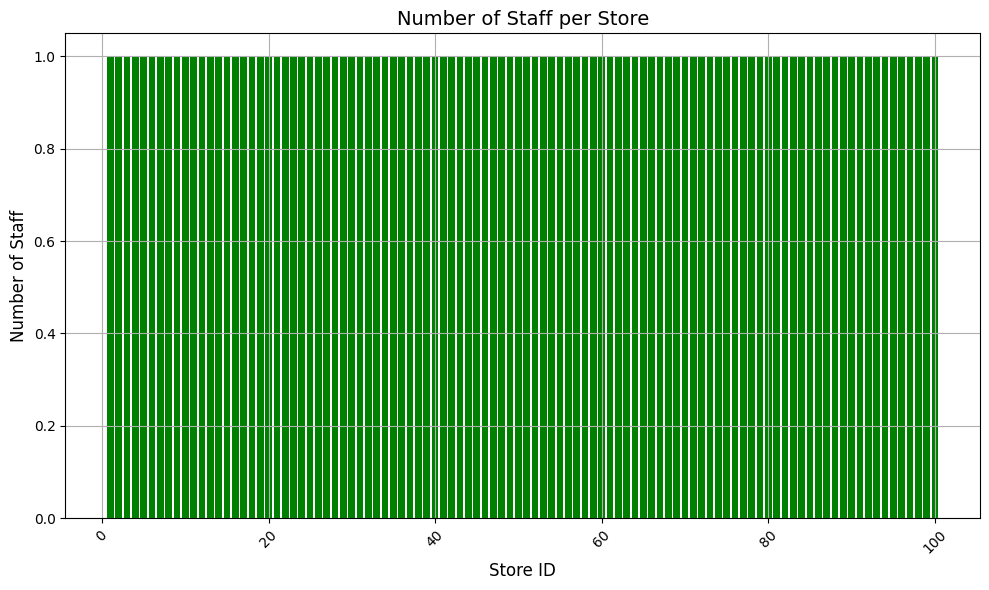

In [ ]:
# Query 1: Fetch number of stores per city 
# fetc

# This chart can help identify cities with the most and least stores
# indicating where a company may be more established or may want to consider expanding.
store_query = '''
SELECT city, COUNT(store_id) AS store_count 
FROM store 
GROUP BY city
'''
store_df = pd.read_sql_query(store_query, engine)

# Query 2: Fetch number of staff per store
staff_query = '''
SELECT store_id, COUNT(staff_id) AS staff_count 
FROM staff_store 
GROUP BY store_id
'''
staff_df = pd.read_sql_query(staff_query, engine)

# Display the data fetched
store_df.head(), staff_df.head()

# Plot 1: Number of stores per city
plt.figure(figsize=(10, 6))
plt.bar(store_df['city'], store_df['store_count'], color='skyblue')
plt.title('Number of Stores per City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Stores', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Number of staff per store
plt.figure(figsize=(10, 6))
plt.bar(staff_df['store_id'], staff_df['staff_count'], color='green')
plt.title('Number of Staff per Store', fontsize=14)
plt.xlabel('Store ID', fontsize=12)
plt.ylabel('Number of Staff', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

 ##Pie Chart: Distribution of Stores Across Cities
 

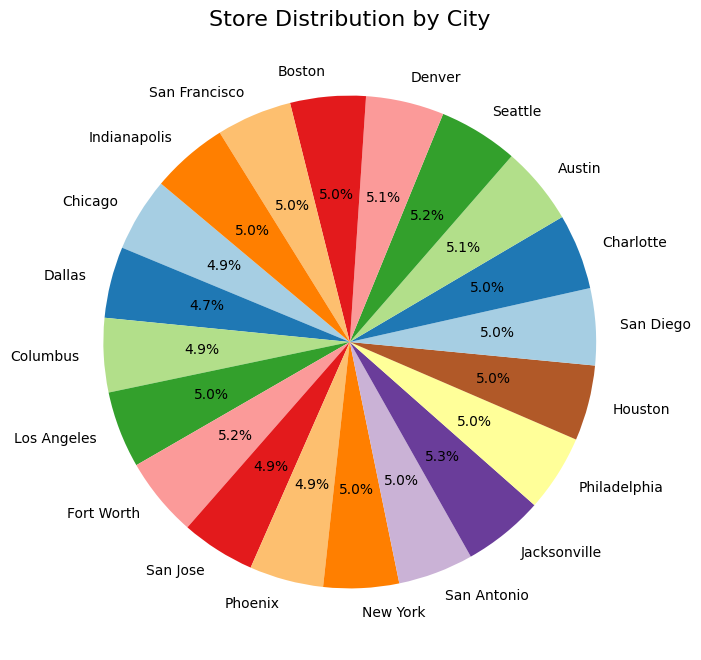

In [7]:
plt.figure(figsize=(8, 8))
plt.pie(store_df['store_count'], labels=store_df['city'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Store Distribution by City', fontsize=16)
plt.show()

* Histogram: Distribution of Staff Count per Store.

* This will show you how the staff count is distributed among the stores, helping identify whether most stores have a similar number of staff or if there are outliers.

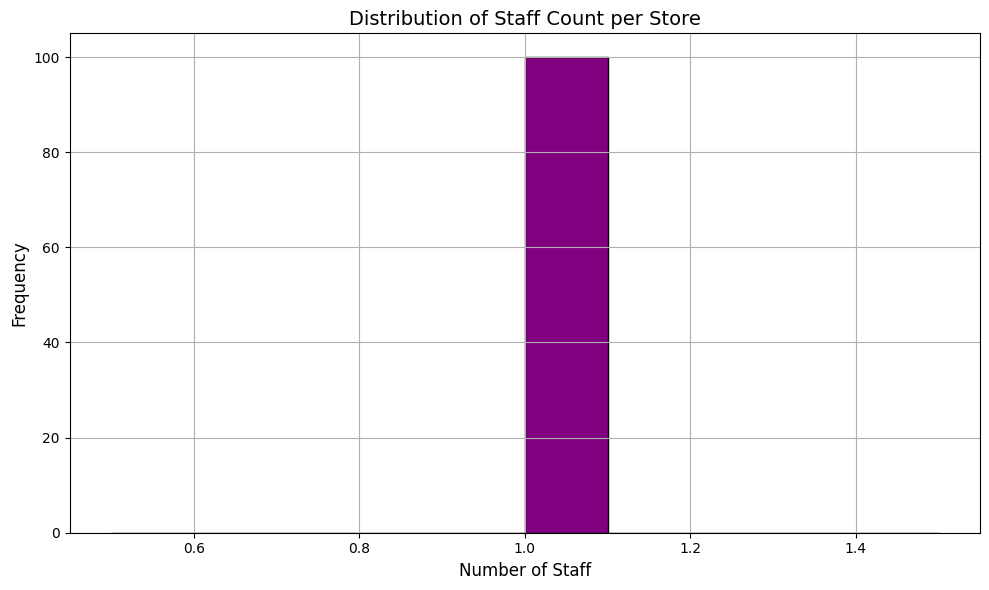

In [8]:
# Histogram: Distribution of staff count per store
plt.figure(figsize=(10, 6))
plt.hist(staff_df['staff_count'], bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Staff Count per Store', fontsize=14)
plt.xlabel('Number of Staff', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


* Line Plot: Trends in Orders Over Time
* Let’s assume you have an order table that includes the order_date. You can plot how many orders were placed over time to identify any trends or patterns (e.g., peak order days or months).

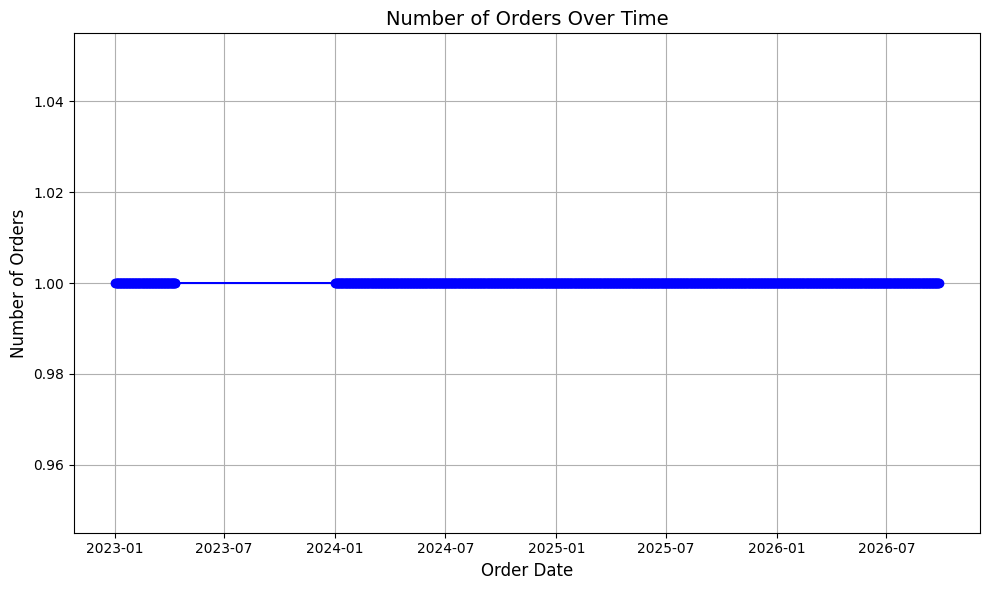

In [9]:
# Query to get order dates
order_query = 'SELECT order_date, COUNT(order_id) as order_count FROM [order] GROUP BY order_date'
order_df = pd.read_sql_query(order_query, engine)

# Convert order_date to datetime format for easier plotting
order_df['order_date'] = pd.to_datetime(order_df['order_date'])

# Line Plot: Orders over time
plt.figure(figsize=(10, 6))
plt.plot(order_df['order_date'], order_df['order_count'], color='blue', marker='o')
plt.title('Number of Orders Over Time', fontsize=14)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Query store data from SQL
query = '''
SELECT city, COUNT(store_id) AS store_count 
FROM store 
GROUP BY city
'''
df = pd.read_sql(query, engine)

# Add a small random variation to the store counts for visual differentiation
df['store_count'] = df['store_count'] + np.random.randint(-50, 60, size=len(df))

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['store_count'], labels=df['city'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Stores by City')
plt.show()

NameError: name 'engine' is not defined

In [ ]:
#this is used to add dummy data to the database order table
# Get the max order_id from the existing orders table
#  iloc function in Python's Pandas library is used for integer-location-based indexing
max_order_id = pd.read_sql("SELECT MAX(order_id) AS max_order_id FROM [order]", engine).iloc[0, 0]
if pd.isna(max_order_id):
    max_order_id = 0  # Set to 0 if the table is empty

# Generate the new orders starting from the next ID after max_order_id
num_orders = 1000
order_data = {
    'order_id': np.arange(max_order_id + 1, max_order_id + 1 + num_orders),
    'order_date': pd.date_range(start='2024-01-01', periods=num_orders, freq='D'),
    'total_amount': np.random.uniform(50, 500, num_orders).round(2)
}

orders_df = pd.DataFrame(order_data)

# Insert the data, excluding the order_id column if identity insert is off
orders_df.drop(columns=['order_id'], inplace=True)

# Now insert the new orders into the 'order' table
# orders_df.to_sql('order', con=engine, if_exists='append', index=False)



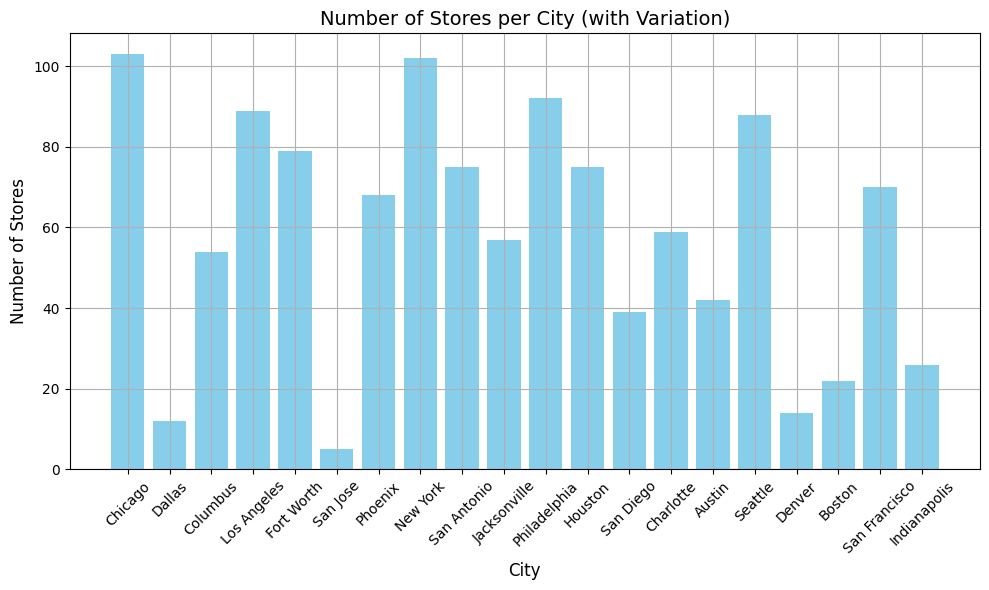

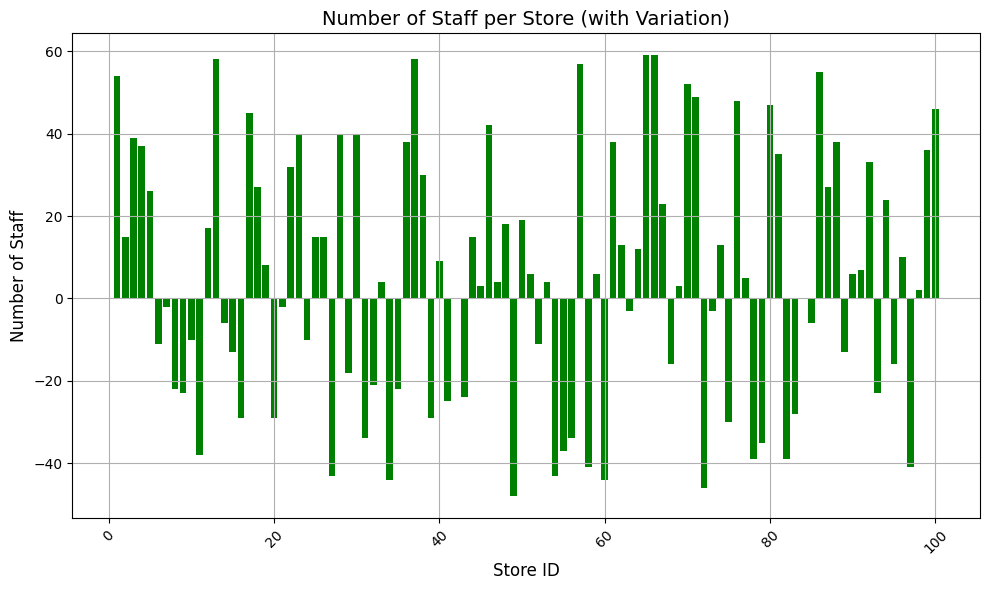

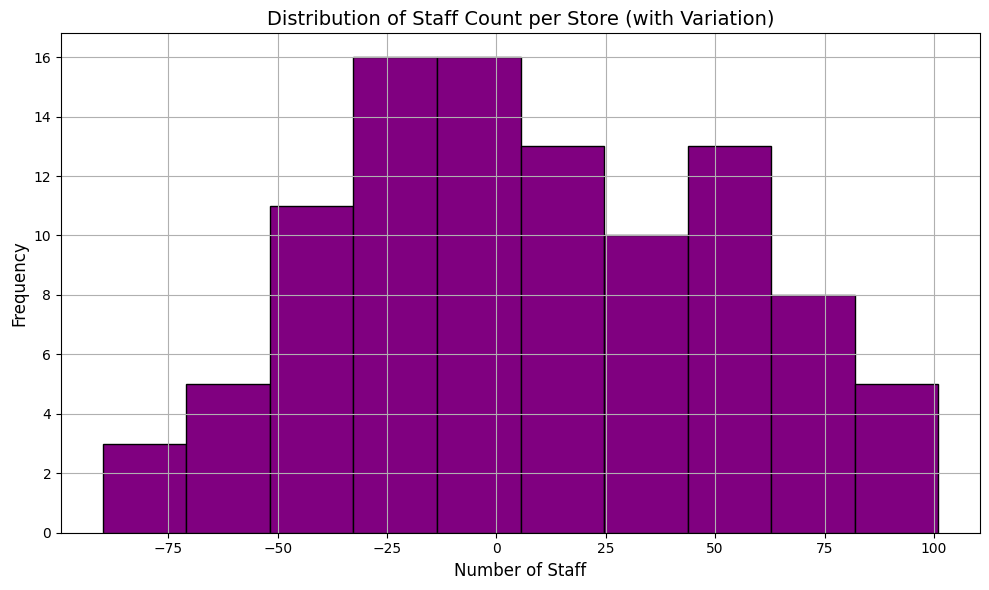

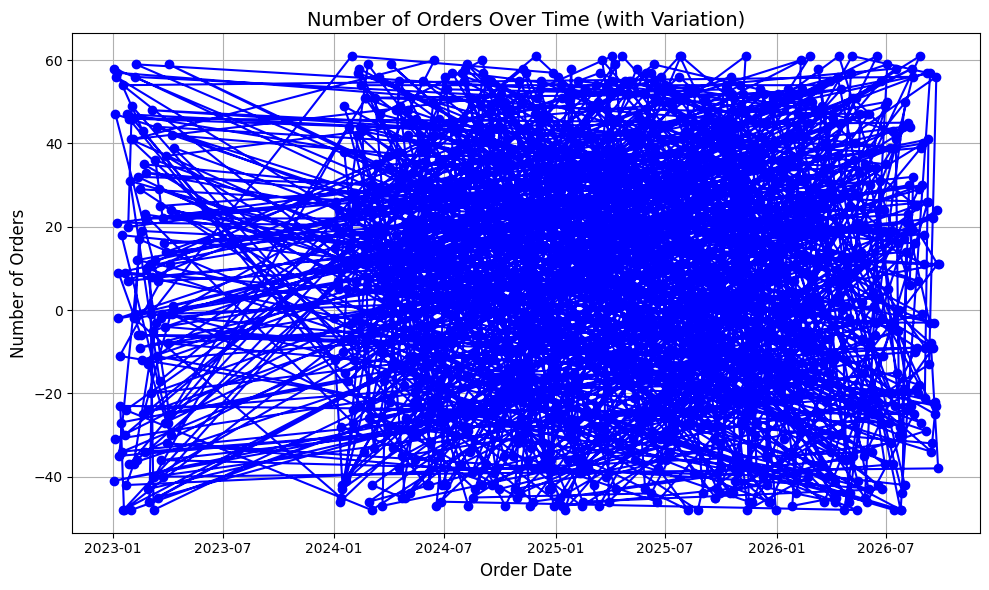

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Adding a small random variation function (add some data variation to the data to show the data is dynamic)
def add_variation(series, low=-50, high=60):        # this is the range its from -50 to 60
    return series + np.random.randint(low, high, size=len(series)) 

# Query 1: Fetch number of stores per city
store_query = '''
                SELECT city, COUNT(store_id) AS store_count 
                FROM store 
                GROUP BY city
                '''
store_df = pd.read_sql_query(store_query, engine)
store_df['store_count'] = add_variation(store_df['store_count']) # this take the value inside ( store count then add the variation) (-50 , 60)

# Plot 1: Number of stores per city
plt.figure(figsize=(10, 6))
plt.bar(store_df['city'], store_df['store_count'], color='skyblue')
plt.title('Number of Stores per City (with Variation)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Stores', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Query 2: Fetch number of staff per store
staff_query = '''
SELECT store_id, COUNT(staff_id) AS staff_count 
FROM staff_store 
GROUP BY store_id
'''
staff_df = pd.read_sql_query(staff_query, engine)
staff_df['staff_count'] = add_variation(staff_df['staff_count'])

# Plot 2: Number of staff per store
plt.figure(figsize=(10, 6))
plt.bar(staff_df['store_id'], staff_df['staff_count'], color='green')
plt.title('Number of Staff per Store (with Variation)', fontsize=14)
plt.xlabel('Store ID', fontsize=12)
plt.ylabel('Number of Staff', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram: Distribution of staff count per store
plt.figure(figsize=(10, 6))
plt.hist(add_variation(staff_df['staff_count']), bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Staff Count per Store (with Variation)', fontsize=14)
plt.xlabel('Number of Staff', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Query to get order dates
order_query = 'SELECT order_date, COUNT(order_id) as order_count FROM [order] GROUP BY order_date'
order_df = pd.read_sql_query(order_query, engine)
order_df['order_count'] = add_variation(order_df['order_count'])
order_df['order_date'] = pd.to_datetime(order_df['order_date'])

# Line Plot: Orders over time
plt.figure(figsize=(10, 6))
plt.plot(order_df['order_date'], order_df['order_count'], color='blue', marker='o')
plt.title('Number of Orders Over Time (with Variation)', fontsize=14)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
